In [8]:
# A library for programmatic plot generation.
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd
# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

import joblib

In [9]:
path = "hvstat_africa_data_v1.0.csv"

In [10]:
df = pd.read_csv(path)

In [11]:
df.head()

,fnid,country,country_code,admin_1,admin_2,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,QC_flag,area,production,yield
0,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2007,10,2008,4,All (PS),0,1364.0,19588.0,14.360704
1,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2008,10,2009,4,All (PS),0,1364.0,20461.0,15.000733
2,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2014,10,2015,4,All (PS),0,8706.0,222044.0,25.504709
3,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2015,10,2016,4,All (PS),0,8706.0,222044.0,25.504709
4,AO2008A101,Angola,AO,Bengo,none,Banana,Main,2016,10,2017,4,All (PS),0,9549.7,233967.0,24.499932


In [12]:
df.tail()

,fnid,country,country_code,admin_1,admin_2,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,QC_flag,area,production,yield
193478,ZW2018A118,Zimbabwe,ZW,Masvingo,none,Sweet Potatoes,Main,2018,11,2019,6,All (PS),0,5100.0,23850.0,4.676471
193479,ZW2018A118,Zimbabwe,ZW,Masvingo,none,Sweet Potatoes,Main,2019,11,2020,6,All (PS),0,5392.0,16572.0,3.073442
193480,ZW2018A118,Zimbabwe,ZW,Masvingo,none,Sweet Potatoes,Main,2020,11,2021,6,All (PS),0,13319.0,111269.0,8.354156
193481,ZW2018A118,Zimbabwe,ZW,Masvingo,none,Sweet Potatoes,Main,2021,11,2022,6,All (PS),0,7060.0,39409.0,5.582011
193482,ZW2018A118,Zimbabwe,ZW,Masvingo,none,Sweet Potatoes,Main,2022,11,2023,6,All (PS),0,7060.0,39409.0,5.582011


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193483 entries, 0 to 193482
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fnid                    193483 non-null  object 
 1   country                 193483 non-null  object 
 2   country_code            193483 non-null  object 
 3   admin_1                 193483 non-null  object 
 4   admin_2                 193483 non-null  object 
 5   product                 193483 non-null  object 
 6   season_name             193483 non-null  object 
 7   planting_year           193483 non-null  int64  
 8   planting_month          193483 non-null  int64  
 9   harvest_year            193483 non-null  int64  
 10  harvest_month           193483 non-null  int64  
 11  crop_production_system  193483 non-null  object 
 12  QC_flag                 193483 non-null  int64  
 13  area                    181060 non-null  float64
 14  production          

In [14]:
df.isnull().sum()

fnid                          0
country                       0
country_code                  0
admin_1                       0
admin_2                       0
product                       0
season_name                   0
planting_year                 0
planting_month                0
harvest_year                  0
harvest_month                 0
crop_production_system        0
QC_flag                       0
area                      12423
production                 4388
yield                     17033
dtype: int64

In [15]:
missing_proportion = df.isnull().sum() / len(df) * 100
print(missing_proportion)


fnid                      0.000000
country                   0.000000
country_code              0.000000
admin_1                   0.000000
admin_2                   0.000000
product                   0.000000
season_name               0.000000
planting_year             0.000000
planting_month            0.000000
harvest_year              0.000000
harvest_month             0.000000
crop_production_system    0.000000
QC_flag                   0.000000
area                      6.420719
production                2.267900
yield                     8.803357
dtype: float64


In [16]:
# Get unique values in the admin_1 column
unique_admin_1_values = df['admin_1'].unique()

# Print the unique values
print(unique_admin_1_values)


['Bengo' 'Benguela' 'Bie' 'Cabinda' 'Cunene' 'Huambo' 'Huila'
 'Kuando Kubango' 'Kuanza Norte' 'Kuanza Sul' 'Luanda' 'Lunda Norte'
 'Lunda Sul' 'Malanje' 'Moxico' 'Namibe' 'Uige' 'Zaire' 'Centre'
 'Boucle du Mouhoun' 'Cascades' 'Centre-Est' 'Centre-Nord' 'Centre-Ouest'
 'Centre-Sud' 'Est' 'Hauts-Bassins' 'Nord' 'Plateau-Central' 'Sahel'
 'Sud-Ouest' 'Bubanza' 'Bujumbura Rural' 'Bururi' 'Cankuzo' 'Cibitoke'
 'Gitega' 'Karuzi' 'Kayanza' 'Kirundo' 'Makamba' 'Muramvya' 'Muyinga'
 'Mwaro' 'Ngozi' 'Rutana' 'Ruyigi' 'Borgou' 'Ouémé' 'Zou' 'Mono' 'Atacora'
 'Atlantique' 'Alibori' 'Plateau' 'Collines' 'Couffo' 'Donga' 'Littoral'
 'Kongo-Central' 'Maniema' 'North Kivu' 'South Kivu' 'Bas-Uele' 'Equateur'
 'Haut-Katanga' 'Haut-Lomami' 'Haut-Uele' 'Kasai' 'Kasai-Central' 'Kwango'
 'Kwilu' 'Lomami' 'Lualaba' 'Mai-Ndombe' 'North Ubangi' 'Sankuru'
 'South Ubangi' 'Tanganyika' 'Tshopo' 'Ombella-Mpoko' 'Lobaye'
 'Mambere-Kadei' 'Nana-Mambere' 'Sangha-Mbaere' 'Ouham-Pende' 'Ouham'
 'Kemo' 'Nana-Grebizi' 

In [17]:
# Get unique values in the admin_2 column
unique_admin_2_values = df['admin_2'].unique()

# Print the unique values
print(unique_admin_2_values)


['none' 'Kadiogo' 'Bale' 'Banwa' 'Kossi' 'Mouhoun' 'Nayala' 'Sourou'
 'Comoe' 'Leraba' 'Boulgou' 'Koulpelogo' 'Kouritenga' 'Bam' 'Namentenga'
 'Sanmatenga' 'Boulkiemde' 'Sanguie' 'Sissili' 'Ziro' 'Bazega' 'Nahouri'
 'Zoundweogo' 'Gnagna' 'Gourma' 'Komandjari' 'Kompienga' 'Tapoa' 'Houet'
 'Kenedougou' 'Tuy' 'Loroum' 'Passore' 'Yatenga' 'Zondoma' 'Ganzourgou'
 'Kourweogo' 'Oubritenga' 'Oudalan' 'Seno' 'Soum' 'Yagha' 'Bougouriba'
 'Ioba' 'Noumbiel' 'Poni' 'Bembéréké' 'Kalalé' "N'Dali" 'Nikki' 'Parakou'
 'Pèrèrè' 'Sinendé' 'Tchaourou' 'Adjarra' 'Adjohoun' 'Aguégués'
 'Akpro-Missérété' 'Avrankou' 'Bonou' 'Dangbo' 'Porto-Novo' 'Sèmè-Kpodji'
 'Abomey' 'Agbangnizoun' 'Bohicon' 'Covè' 'Djidja' 'Ouinhi' 'Zagnanado'
 'Za-Kpota' 'Zogbodomey' 'Athiémé' 'Bopa' 'Comè' 'Grand-Popo' 'Houéyogbé'
 'Lokossa' 'Boukoumbé' 'Cobly' 'Kérou' 'Kouandé' 'Matéri' 'Natitingou'
 'Péhunco' 'Tanguiéta' 'Toucountouna' 'Abomey-Calavi' 'Allada' 'Kpomassè'
 'Ouidah' 'Sô-Ava' 'Toffo' 'Tori-Bossito' 'Zè' 'Banikoara' 'Gogono

In [18]:
# Drop the admin_2 column
df.drop(columns=['fnid'], inplace=True)

# Verify the column has been deleted
print(df.columns)


Index(['country', 'country_code', 'admin_1', 'admin_2', 'product',
       'season_name', 'planting_year', 'planting_month', 'harvest_year',
       'harvest_month', 'crop_production_system', 'QC_flag', 'area',
       'production', 'yield'],
      dtype='object')


In [19]:
# Rename the admin_1 column to Province
df.rename(columns={'admin_1': 'province'}, inplace=True)

# Verify the change
print(df.head())


  country country_code province admin_2 product season_name  planting_year  \
0  Angola           AO    Bengo    none  Banana        Main           2007   
1  Angola           AO    Bengo    none  Banana        Main           2008   
2  Angola           AO    Bengo    none  Banana        Main           2014   
3  Angola           AO    Bengo    none  Banana        Main           2015   
4  Angola           AO    Bengo    none  Banana        Main           2016   

   planting_month  harvest_year  harvest_month crop_production_system  \
0              10          2008              4               All (PS)   
1              10          2009              4               All (PS)   
2              10          2015              4               All (PS)   
3              10          2016              4               All (PS)   
4              10          2017              4               All (PS)   

   QC_flag    area  production      yield  
0        0  1364.0     19588.0  14.360704  
1   

In [20]:
print(missing_proportion)

fnid                      0.000000
country                   0.000000
country_code              0.000000
admin_1                   0.000000
admin_2                   0.000000
product                   0.000000
season_name               0.000000
planting_year             0.000000
planting_month            0.000000
harvest_year              0.000000
harvest_month             0.000000
crop_production_system    0.000000
QC_flag                   0.000000
area                      6.420719
production                2.267900
yield                     8.803357
dtype: float64


In [22]:
# Reset the index without inserting existing index levels as columns
df = df.reset_index(drop=True)

# Function to calculate and fill missing area values
def fill_area_with_mode(group):
    mode_area = group['area'].mode()  # Calculate the mode
    if not mode_area.empty:  # Check if the mode exists
        group['area'] = group['area'].fillna(mode_area[0])  # Fill missing values with mode
    return group

# Group by country and province and apply the function
df = df.groupby(['country', 'province'], group_keys=False).apply(fill_area_with_mode)

# Verify if there are still missing values in the 'area' column
print(df['area'].isnull().sum())




780


C:\Users\ELOHOME\AppData\Local\Temp\ipykernel_22932\47219094.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['country', 'province'], group_keys=False).apply(fill_area_with_mode)


In [23]:
# Function to calculate and fill missing production values
def fill_production_with_median(group):
    median_production = group['production'].median()  # Calculate the median
    group['production'] = group['production'].fillna(median_production)  # Fill missing values with median
    return group

# Group by country and Province and apply the function
df = df.groupby(['country', 'province'], group_keys=False).apply(fill_production_with_median)

# Verify if there are still missing values in the 'production' column
print(df['production'].isnull().sum())


0


C:\Users\ELOHOME\AppData\Local\Temp\ipykernel_22932\3533851781.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['country', 'province'], group_keys=False).apply(fill_production_with_median)


In [24]:
# Function to calculate and fill missing yield values
def fill_yield_with_median(group):
    median_yield = group['yield'].median()  # Calculate the median
    group['yield'] = group['yield'].fillna(median_yield)  # Fill missing values with median
    return group

# Group by country, Province, and product and apply the function
df = df.groupby(['country', 'province'], group_keys=False).apply(fill_yield_with_median)

# Verify if there are still missing values in the 'yield' column
print(df['yield'].isnull().sum())


c:\Users\ELOHOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ELOHOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ELOHOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ELOHOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ELOHOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis

808


C:\Users\ELOHOME\AppData\Local\Temp\ipykernel_22932\568280192.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['country', 'province'], group_keys=False).apply(fill_yield_with_median)


In [25]:
# Drop rows where the 'yield' column has missing values
df = df[df['yield'].notnull()]

# Verify if there are any remaining missing values
print(df['yield'].isnull().sum())


0


In [26]:
df.isnull().sum()

country                   0
country_code              0
province                  0
admin_2                   0
product                   0
season_name               0
planting_year             0
planting_month            0
harvest_year              0
harvest_month             0
crop_production_system    0
QC_flag                   0
area                      0
production                0
yield                     0
dtype: int64

In [27]:
df.describe()

,planting_year,planting_month,harvest_year,harvest_month,QC_flag,area,production,yield
count,192675.000000,192675.000000,192675.000000,192675.000000,192675.000000,1.926750e+05,1.926750e+05,192675.000000
mean,2005.410806,6.224907,2005.843327,8.304201,0.000275,3.129686e+04,3.974607e+04,3.370426
std,10.125293,3.019347,10.153139,3.624395,0.016583,4.067437e+06,2.103087e+05,11.887667
min,1960.000000,1.000000,1960.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000047
25%,2000.000000,3.000000,2000.000000,5.000000,0.000000,1.430000e+02,2.740000e+02,0.574242
50%,2007.000000,6.000000,2007.000000,10.000000,0.000000,1.533000e+03,2.153208e+03,1.019000
75%,2013.000000,9.000000,2013.000000,12.000000,0.000000,1.075994e+04,1.463838e+04,2.380999
max,2023.000000,11.000000,2023.000000,12.000000,1.000000,1.751414e+09,8.899134e+06,1229.428571


In [28]:
# Convert planting_year, harvest_year, and harvest_month to integers
df['planting_year'] = df['planting_year'].astype(int)
df['harvest_year'] = df['harvest_year'].astype(int)
df['harvest_month'] = df['harvest_month'].astype(int)

# Verify changes
print(df[['planting_year', 'harvest_year', 'harvest_month']].dtypes)


planting_year    int64
harvest_year     int64
harvest_month    int64
dtype: object


In [29]:
# Combine harvest_year and harvest_month into a single datetime column
df['harvest_date'] = pd.to_datetime(df['harvest_year'].astype(str) + '-' + df['harvest_month'].astype(str) + '-01')

# Verify the new harvest_date column
print(df[['harvest_date']].head())


  harvest_date
0   2008-04-01
1   2009-04-01
2   2015-04-01
3   2016-04-01
4   2017-04-01


In [30]:
# Combine planting_year and harvest_month to create planting_date
df['planting_date'] = pd.to_datetime(df['planting_year'].astype(str) + '-01-01')

# Calculate the difference in days between harvest and planting
df['time_to_harvest'] = (df['harvest_date'] - df['planting_date']).dt.days

# Verify the new column
print(df[['planting_date', 'harvest_date', 'time_to_harvest']].head())


  planting_date harvest_date  time_to_harvest
0    2007-01-01   2008-04-01              456
1    2008-01-01   2009-04-01              456
2    2014-01-01   2015-04-01              455
3    2015-01-01   2016-04-01              456
4    2016-01-01   2017-04-01              456


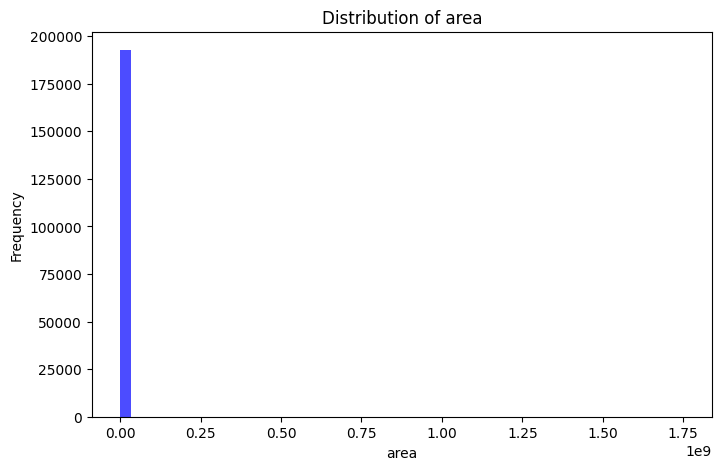

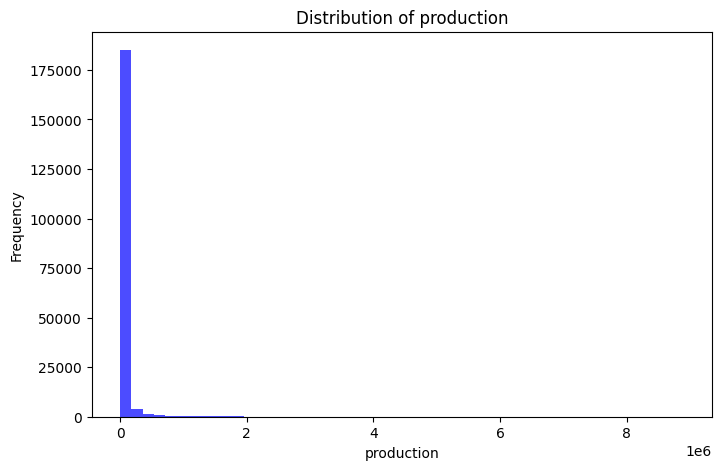

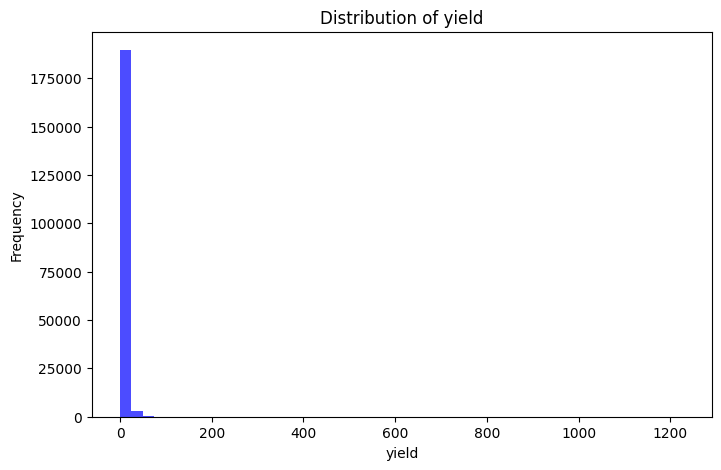

In [31]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_columns = ['area', 'production', 'yield']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=50, color='blue', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


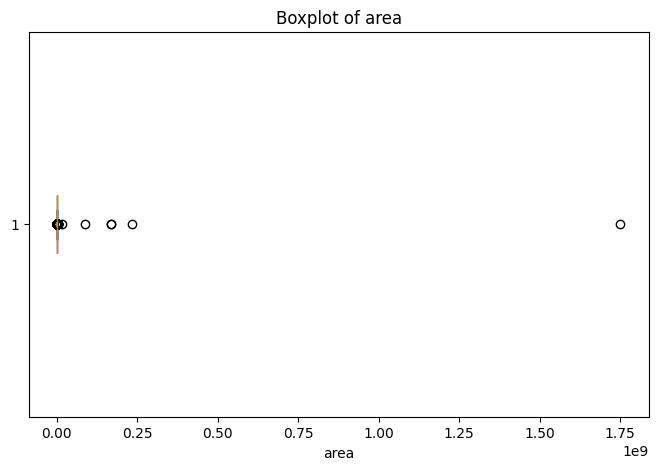

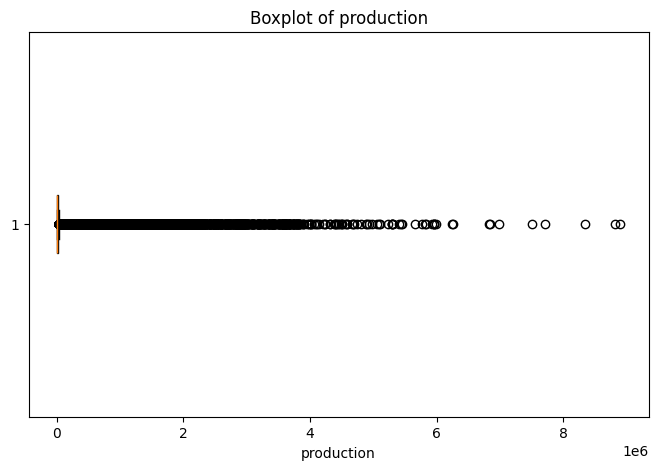

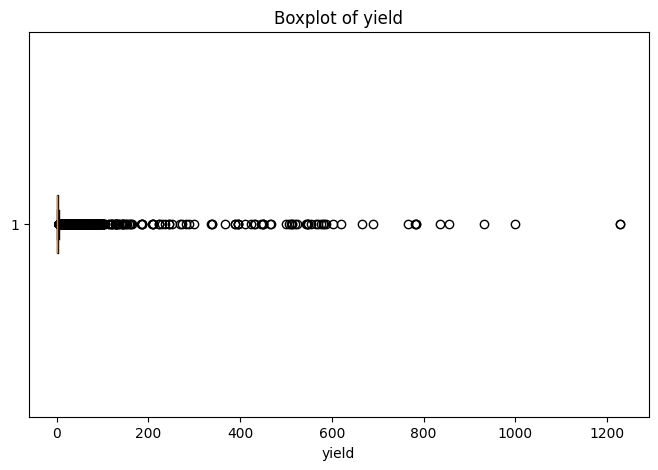

In [32]:
# Plot boxplots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [33]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # First Quartile
    Q3 = df[col].quantile(0.75)  # Third Quartile
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Number of outliers in {col}: {len(outliers)}')


Number of outliers in area: 29449
Number of outliers in production: 28709
Number of outliers in yield: 31181


In [34]:
df.head()


,country,country_code,province,admin_2,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,QC_flag,area,production,yield,harvest_date,planting_date,time_to_harvest
0,Angola,AO,Bengo,none,Banana,Main,2007,10,2008,4,All (PS),0,1364.0,19588.0,14.360704,2008-04-01,2007-01-01,456
1,Angola,AO,Bengo,none,Banana,Main,2008,10,2009,4,All (PS),0,1364.0,20461.0,15.000733,2009-04-01,2008-01-01,456
2,Angola,AO,Bengo,none,Banana,Main,2014,10,2015,4,All (PS),0,8706.0,222044.0,25.504709,2015-04-01,2014-01-01,455
3,Angola,AO,Bengo,none,Banana,Main,2015,10,2016,4,All (PS),0,8706.0,222044.0,25.504709,2016-04-01,2015-01-01,456
4,Angola,AO,Bengo,none,Banana,Main,2016,10,2017,4,All (PS),0,9549.7,233967.0,24.499932,2017-04-01,2016-01-01,456


In [36]:
# Select relevant columns
features = ['country', 'province', 'product', 'season_name', 'time_to_harvest', 'area', 'production']
target = 'yield'

X = df[features]
y = df[target]

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Preprocessing: OneHotEncoding for categorical variables, scaling for numerical variables
categorical_features = ['country', 'province', 'product', 'season_name']
numerical_features = ['time_to_harvest', 'area', 'production']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

In [42]:
# Linear Regression Model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [43]:
# Train the Linear Regression model
lr_pipeline.fit(X_train, y_train)

# Evaluate Linear Regression
y_train_pred = lr_pipeline.predict(X_train)
y_test_pred = lr_pipeline.predict(X_test)

train_mse_lr = mean_squared_error(y_train, y_train_pred)
test_mse_lr = mean_squared_error(y_test, y_test_pred)

print(f"Linear Regression - Train MSE: {train_mse_lr}, Test MSE: {test_mse_lr}")

Linear Regression - Train MSE: 103.86898750648034, Test MSE: 152.66249418731346


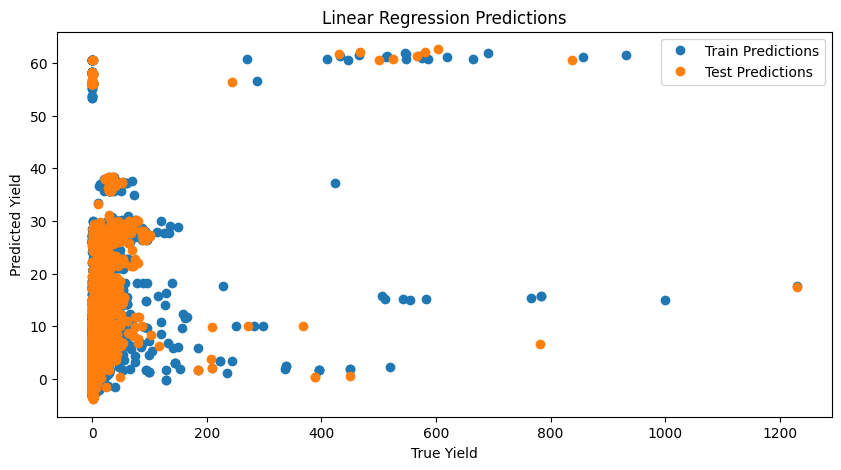

In [44]:
# Plot loss curve for Linear Regression
plt.figure(figsize=(10, 5))
plt.plot(y_train, y_train_pred, 'o', label='Train Predictions')
plt.plot(y_test, y_test_pred, 'o', label='Test Predictions')
plt.title('Linear Regression Predictions')
plt.xlabel('True Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.show()

In [45]:
# Decision Tree Model
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_pipeline.fit(X_train, y_train)
y_test_pred_dt = dt_pipeline.predict(X_test)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
print(f"Decision Tree - Test MSE: {test_mse_dt}")

Decision Tree - Test MSE: 106.62227158711481


In [46]:
# Random Forest Model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_test_pred_rf = rf_pipeline.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
print(f"Random Forest - Test MSE: {test_mse_rf}")

Random Forest - Test MSE: 102.11318819530501


In [47]:
# Compare models and save the best one
if test_mse_lr < test_mse_dt and test_mse_lr < test_mse_rf:
    best_model = lr_pipeline
    print("Best model: Linear Regression")
elif test_mse_dt < test_mse_rf:
    best_model = dt_pipeline
    print("Best model: Decision Tree")
else:
    best_model = rf_pipeline
    print("Best model: Random Forest")

Best model: Random Forest


In [48]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [49]:
# Script for making predictions
def predict_yield(input_data):
    """
    Predict crop yield using the best model.
    :param input_data: DataFrame containing input features
    :return: Predicted yield
    """
    model = joblib.load('best_model.pkl')
    return model.predict(input_data)

In [51]:
# Example usage of the prediction script
example_input = pd.DataFrame({
    'country': ['Country1'],
    'province': ['Province1'],
    'product': ['Product1'],
    'season_name': ['Season1'],
    'time_to_harvest': [30],
    'area': [100],
    'production': [500]
})

predicted_yield = predict_yield(example_input)
print(f"Predicted Yield: {predicted_yield[0]}")

Predicted Yield: 2.0322764760053325
